In [1]:
from pennylane import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from QCUnet import *
from unitary import U_TTN, U_5
import pandas as pd
import ast
import re 



w:\summer school\Methane leaks\base research\code\Methane-Plume-Segmentation-main\Our_QCNN\QuantaMinds\src\train.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:

PATH_D_TRAIN=os.getcwd() + "/data/DataTrain/input_tiles/"
PATH_S_TRAIN=os.getcwd()+"/data/DataTrain/output_matrix/"
PATH_D_TEST=os.getcwd()+"/data/DataTest/input_tiles/"
PATH_S_TEST=os.getcwd()+"/data/DataTest/output_matrix/"

## Experiments visualizations - quantum models

In [5]:

df_archi1 = pd.read_csv('./results/df_exepriments_Archi1.csv')
df_archi2 = pd.read_csv('./results/df_exepriments_Archi2.csv')
df_archi3 = pd.read_csv('./results/df_exepriments_Archi3.csv')
df_archi4 = pd.read_csv('./results/df_exepriments_Archi4.csv')
df_archi5 = pd.read_csv('./results/df_exepriments_Archi5.csv')
df_classical = pd.read_csv('./results/df_exepriments_classical.csv')
# df_classical = pd.DataFrame([])
df_results = pd.concat([df_archi1, df_archi2, df_archi3, df_archi4, df_archi5, df_classical], axis=0)
df_results.reset_index(inplace=True)


def extract_numeric(tensor_str):
    match = re.search(r'tensor\(([^)]+)\)', tensor_str)
    return float(match.group(1)) if match else None

for col in  ['train_loss', 'val_loss', 'train_iou','train_acc']:
    df_results[col] = df_results[col].astype(str)
    df_results[col] = df_results[col].apply(extract_numeric)

df_results

,index,Unnamed: 0,archi,model_name,epochs,batch_size,bands,lr,unitary,opt,loss,train_loss,val_loss,train_iou,train_acc,metrics_by_epoch
0,0,NaN,Archi1,./mod/quantum/Archi1/\ep9_lr0.001_time_19_44_5...,10,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.2378,0.2714,None,0.9617,"{1: {'train_loss': tensor(0.5416), 'val_loss':..."
1,0,NaN,Archi2,./mod/quantum/Archi2/\ep4_lr0.001_time_05_39_1...,5,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.2971,0.3079,None,0.9617,"{1: {'train_loss': tensor(0.5329), 'val_loss':..."
2,0,NaN,Archi3,./mod/quantum/Archi3/ep4_lr0.001_time_14_58_38...,5,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.1752,0.2214,None,0.9627,"{1: {'train_loss': tensor(0.4848), 'val_loss':..."
3,1,NaN,Archi3,./mod/quantum/Archi3/ep4_lr0.01_time_15_40_14_...,5,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.010,NaN,Adam,BCEWithLogitsLoss,0.1639,0.2458,None,0.9627,"{1: {'train_loss': tensor(0.1980), 'val_loss':..."
4,2,NaN,Archi3,./mod/quantum/Archi3/ep4_lr0.001_time_16_18_38...,5,10.0,"[12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.1773,0.2423,None,0.9626,"{1: {'train_loss': tensor(0.4495), 'val_loss':..."
5,3,NaN,Archi3,./mod/quantum/Archi3/ep4_lr0.01_time_16_56_44_...,5,10.0,"[12, 13]",0.010,NaN,Adam,BCEWithLogitsLoss,0.1659,0.2923,None,0.9627,"{1: {'train_loss': tensor(0.1973), 'val_loss':..."
6,4,NaN,Archi3,./mod/quantum/Archi3/ep9_lr0.001_time_18_55_46...,10,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,U_TTN,Adam,BCEWithLogitsLoss,0.1588,0.2165,None,0.9625,"{1: {'train_loss': tensor(0.5974), 'val_loss':..."
7,5,NaN,Archi3,./mod/quantum/Archi3/ep9_lr0.01_time_20_40_09_...,10,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.010,U_TTN,Adam,BCEWithLogitsLoss,0.1600,0.2134,None,0.9627,"{1: {'train_loss': tensor(0.1889), 'val_loss':..."
8,6,NaN,Archi3,./mod/quantum/Archi3/ep9_lr0.001_time_21_55_17...,10,10.0,"[12, 13]",0.001,U_TTN,Adam,BCEWithLogitsLoss,0.1621,0.2915,None,0.9627,"{1: {'train_loss': tensor(0.4845), 'val_loss':..."
9,7,NaN,Archi3,./mod/quantum/Archi3/ep9_lr0.01_time_23_27_46_...,10,10.0,"[12, 13]",0.010,U_TTN,Adam,BCEWithLogitsLoss,0.1603,0.2311,None,0.9627,"{1: {'train_loss': tensor(0.1822), 'val_loss':..."


In [ ]:
df_results.to_csv('./results/df_results_all.csv')

In [152]:
len(df_results)

18

In [6]:

def get_best_model(df_result, archi_num, index=0 ):

    if archi_num== 'all':
        df = df_result
    else: 
        df = df_result[df_result['archi']== archi_num]
    
    if len(df)>0:
        df_sorted = df.sort_values(by =['val_loss', 'train_loss'], ascending=True)
        best_model_infos = df_sorted.iloc[index]
        # print(best_model_infos)
        return best_model_infos
    return None
    
def get_best_model_metrics(df_results, archi_num = 'Archi1',  index =0):
    
    best_model_infos = get_best_model(df_results, archi_num, index=index )
    if best_model_infos is None:
        return  pd.DataFrame([]), {}
    else:
        dict_best_model_metrics_by_epoch_string= best_model_infos['metrics_by_epoch']

        # Step 1: Replace tensor(...) with just the numeric value inside it
        cleaned_string = re.sub(r'tensor\(([\d\.e\-]+)\)', r'\1', dict_best_model_metrics_by_epoch_string)

        # Step 2: Convert the cleaned string to a dictionary
        data_dict = ast.literal_eval(cleaned_string)

        # Step 3: Convert the dictionary to a DataFrame
        df = pd.DataFrame.from_dict(data_dict, orient='index')

        # Add an epoch column if needed
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'epoch'}, inplace=True)
    
        return df, best_model_infos


In [7]:
df_results.sort_values(by =['val_loss', 'train_loss'], ascending=True)

,index,Unnamed: 0,archi,model_name,epochs,batch_size,bands,lr,unitary,opt,loss,train_loss,val_loss,train_iou,train_acc,metrics_by_epoch
16,2,NaN,Archi5,./mod/quantum/Archi5/-------,2,10.0,"[12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.1610,0.1910,None,0.9630,"{1: {'train_loss': tensor(0.264), 'val_loss': ..."
7,5,NaN,Archi3,./mod/quantum/Archi3/ep9_lr0.01_time_20_40_09_...,10,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.010,U_TTN,Adam,BCEWithLogitsLoss,0.1600,0.2134,None,0.9627,"{1: {'train_loss': tensor(0.1889), 'val_loss':..."
6,4,NaN,Archi3,./mod/quantum/Archi3/ep9_lr0.001_time_18_55_46...,10,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,U_TTN,Adam,BCEWithLogitsLoss,0.1588,0.2165,None,0.9625,"{1: {'train_loss': tensor(0.5974), 'val_loss':..."
2,0,NaN,Archi3,./mod/quantum/Archi3/ep4_lr0.001_time_14_58_38...,5,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.1752,0.2214,None,0.9627,"{1: {'train_loss': tensor(0.4848), 'val_loss':..."
12,2,NaN,Archi4,./mod/quantum/Archi4/\ep4_lr0.01_time_21_43_10...,5,10.0,"[12, 13]",0.010,NaN,Adam,BCEWithLogitsLoss,0.1589,0.2249,None,0.9627,"{1: {'train_loss': tensor(0.3102), 'val_loss':..."
9,7,NaN,Archi3,./mod/quantum/Archi3/ep9_lr0.01_time_23_27_46_...,10,10.0,"[12, 13]",0.010,U_TTN,Adam,BCEWithLogitsLoss,0.1603,0.2311,None,0.9627,"{1: {'train_loss': tensor(0.1822), 'val_loss':..."
17,0,NaN,classical,./mod/classical/\ep4_lr0.001_time_20_12_17_idd...,5,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.1682,0.2319,None,0.9626,"{1: {'train_loss': tensor(0.3769), 'val_loss':..."
4,2,NaN,Archi3,./mod/quantum/Archi3/ep4_lr0.001_time_16_18_38...,5,10.0,"[12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,0.1773,0.2423,None,0.9626,"{1: {'train_loss': tensor(0.4495), 'val_loss':..."
3,1,NaN,Archi3,./mod/quantum/Archi3/ep4_lr0.01_time_15_40_14_...,5,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.010,NaN,Adam,BCEWithLogitsLoss,0.1639,0.2458,None,0.9627,"{1: {'train_loss': tensor(0.1980), 'val_loss':..."
13,3,NaN,Archi4,./mod/quantum/Archi4/\ep4_lr0.01_time_07_11_44...,5,10.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.010,NaN,Adam,BCEWithLogitsLoss,0.1586,0.2590,None,0.9627,"{1: {'train_loss': tensor(0.3745), 'val_loss':..."


### Train_loss and val_loss by Epoch 

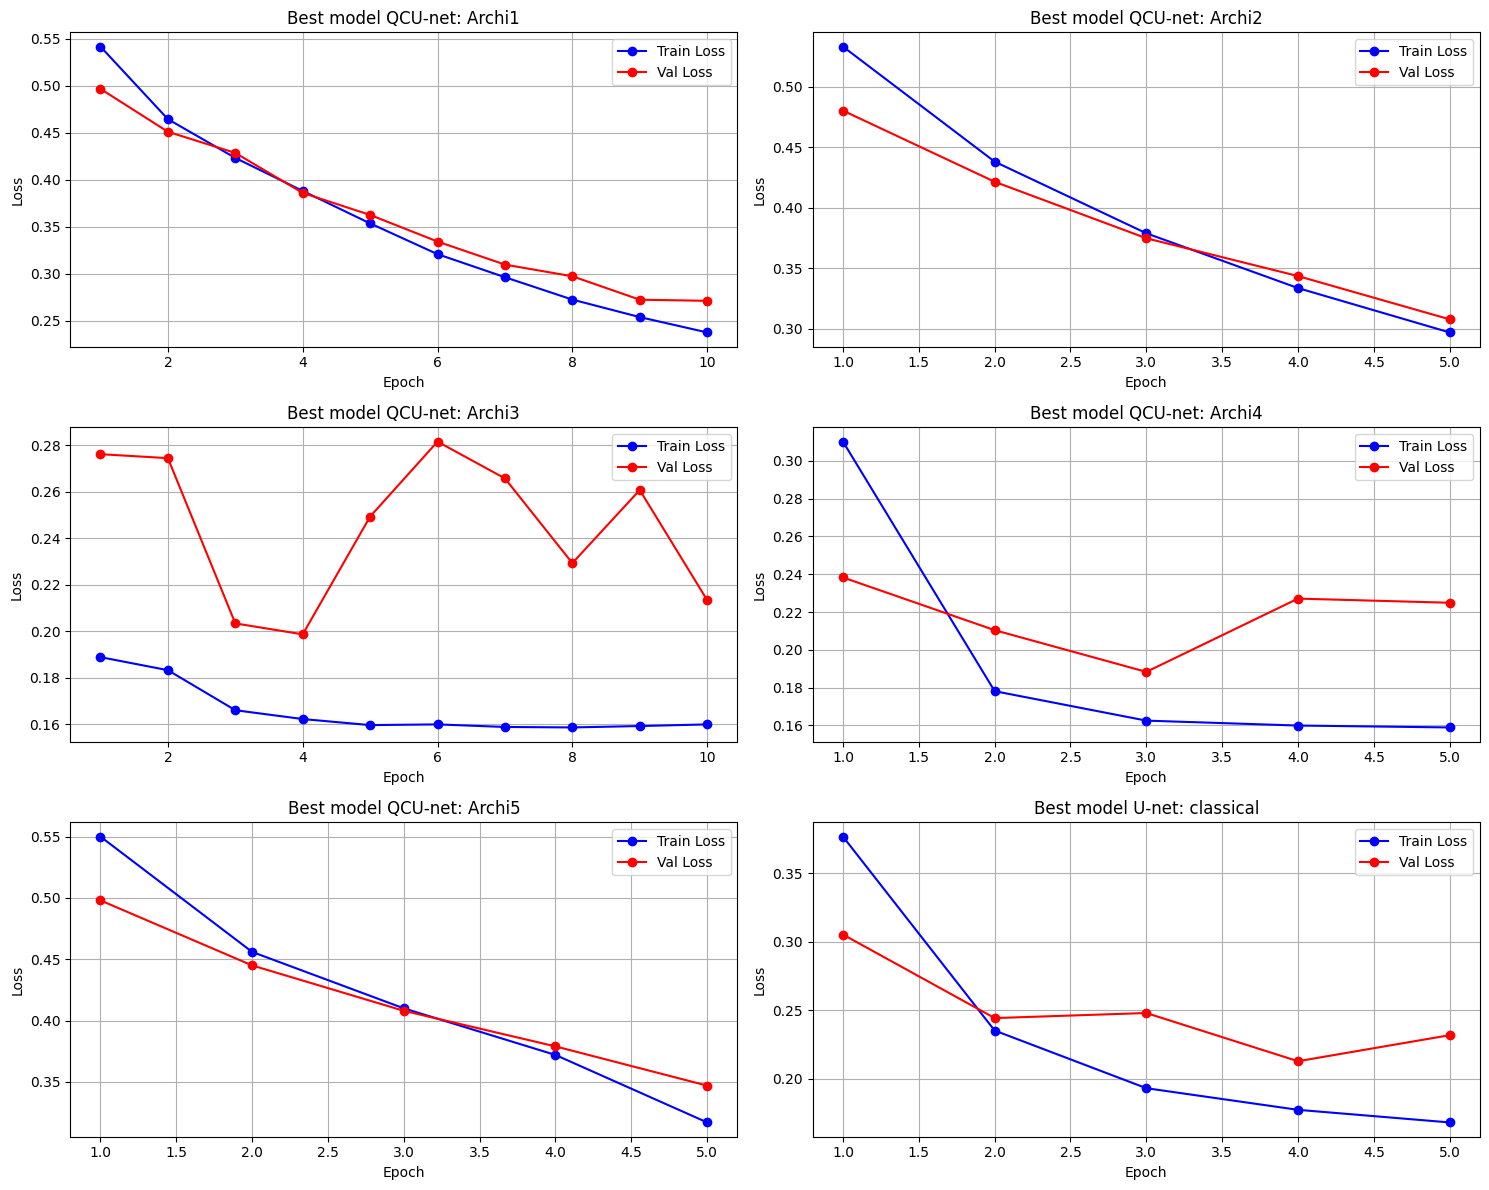

In [8]:
import matplotlib.pyplot as plt


Architetcures =['Archi1', 'Archi2', 'Archi3', 'Archi4', 'Archi5', 'classical']

# Number of mdels and layout
num_models = 6
rows, cols = 3, 2  # 3 rows and 2 columns

fig, axs = plt.subplots(rows, cols, figsize=(15, 12))
i=0 


for archi_num in Architetcures :
# Iterate over the models and plot on each subplot
    row, col = divmod(i, cols)  # Calculate row and column index
    index=0
    if archi_num == 'Archi5':
        index=1
    df, _ = get_best_model_metrics(df_results, archi_num = archi_num, index= index)
    if len(df)>0:
        axs[row, col].plot(df['epoch'], df['train_loss'], marker='o', label='Train Loss', color='blue')
        axs[row, col].plot(df['epoch'], df['val_loss'], marker='o', label='Val Loss', color='red')
        if archi_num in ['Archi1','Archi2', 'Archi3', 'Archi4', 'Archi5']:
            title = 'Best model QCU-net:'
        else: 
            title = 'Best model U-net:'
        axs[row, col].set_title(f'{title} {archi_num}')
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel('Loss')
        axs[row, col].grid(True)
        axs[row, col].legend()

    i =i+1
# Hide any unused subplots (in this case, the last one)
if num_models < rows * cols:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()



### Accurcy By Epoch

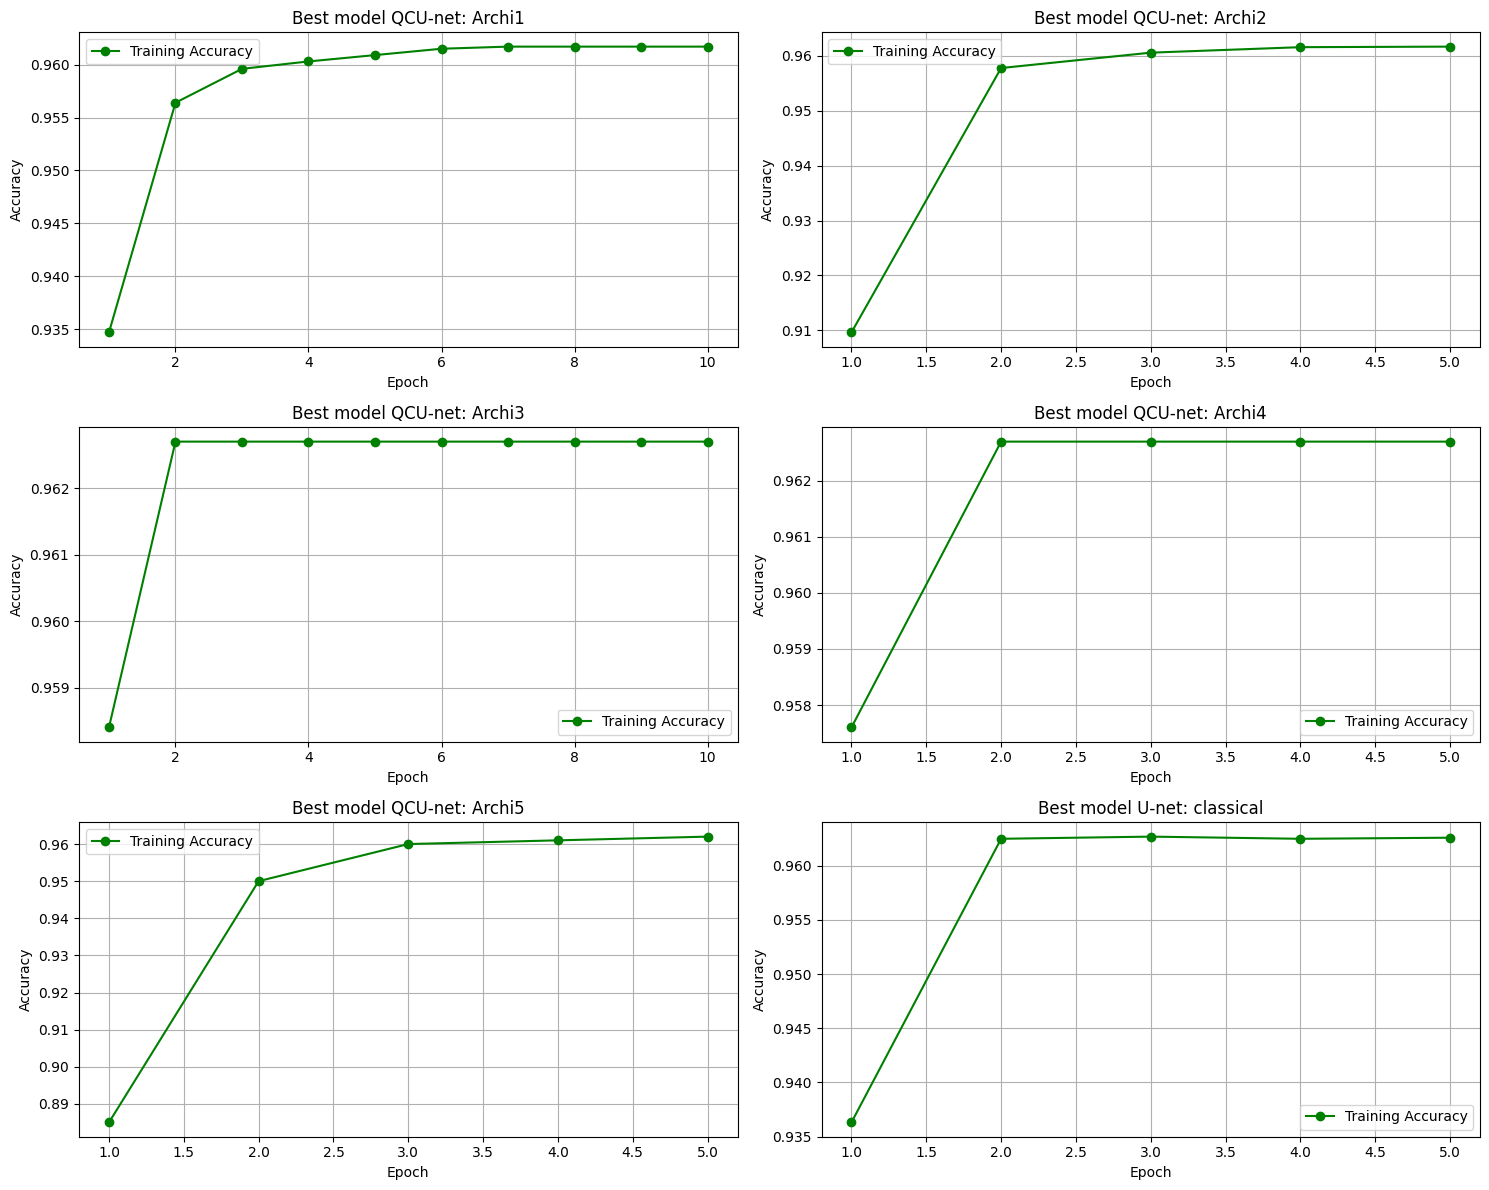

In [161]:
import matplotlib.pyplot as plt


Architetcures =['Archi1', 'Archi2', 'Archi3', 'Archi4', 'Archi5', 'classical']

# Number of mdels and layout
num_models = 6
rows, cols = 3, 2  # 3 rows and 2 columns

fig, axs = plt.subplots(rows, cols, figsize=(15, 12))
i=0 
for archi_num in Architetcures :
# Iterate over the models and plot on each subplot
    row, col = divmod(i, cols)  # Calculate row and column index
    index=0
    if archi_num == 'Archi5':
        index=1
    df, _ = get_best_model_metrics(df_results, archi_num = archi_num, index=index)
    if len(df)>0:
        axs[row, col].plot(df['epoch'], df['train_acc'], label='Training Accuracy', marker='o', color='green')
        if archi_num in ['Archi1','Archi2', 'Archi3', 'Archi4', 'Archi5']:
            title = 'Best model QCU-net:'
        else: 
            title = 'Best model U-net:'
        axs[row, col].set_title(f'{title} {archi_num}')
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel('Accuracy')
        axs[row, col].grid(True)
        axs[row, col].legend()

    i =i+1
# Hide any unused subplots (in this case, the last one)
if num_models < rows * cols:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()



## Accuracy compraison best models of each architecture 

0     0.2714
1     0.3079
7     0.2134
12    0.2249
16    0.1910
17    0.2319
Name: val_loss, dtype: float64


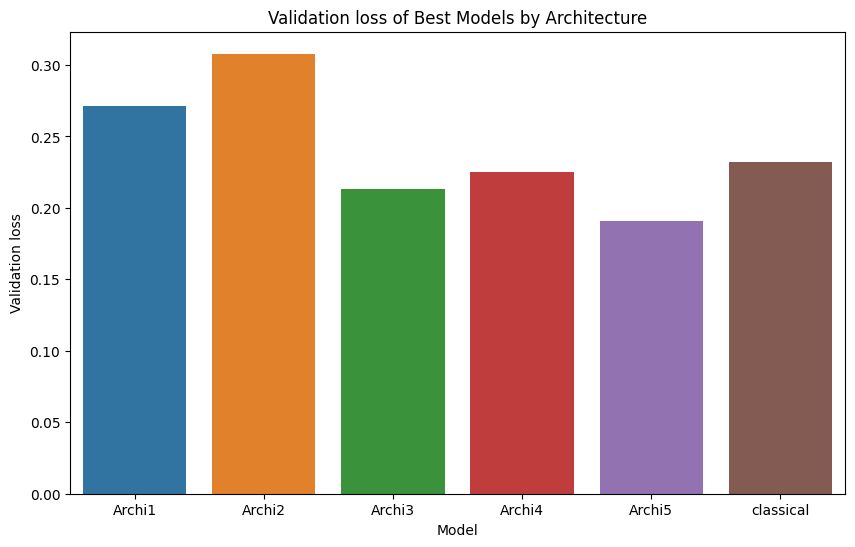

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch 

# Assuming df is your DataFrame

def get_best_model_metrics_all_architetcures():
    df_all_best = pd.DataFrame([])
    for archi_num in Architetcures :
        _, df_archi = get_best_model_metrics(df_results, archi_num = archi_num)
        if len(df_archi)> 0:
            df_all_best = pd.concat([df_all_best , pd.DataFrame([df_archi])])
    # Convert tensor columns to numeric
    # for col in  ['train_loss', 'val_loss', 'train_iou','train_acc']:
    #     df_all_best[col] = df_all_best[col].astype(str)
    #     df_all_best[col] = df_all_best[col].apply(extract_numeric)
    return df_all_best

best_models= get_best_model_metrics_all_architetcures()
print(best_models['val_loss'])
# Group by 'archi' and select the row with the minimum 'val_loss' in each group

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=best_models, x='archi', y='val_loss')

# Add titles and labels
plt.title('Validation loss of Best Models by Architecture')
plt.xlabel('Model')
plt.ylabel('Validation loss')

# Show plot
plt.show()


## Load best Model and Make Predictions

In [27]:
import torch
from torchvision import transforms
from PIL import Image
from data import Normalize,Crop, ToTensor, Randomize
from dataset_stats import *
from QCUBottleNeck import UNetWithQBottleNeck
from QCUnet import QCUNet
from classical_unet import UNet
from subdataset import dataset_images_train
from data import *

# @TODO to be moved to segment.py 

architectures = {    'Archi1' : { 'quantum_layers' : [True, False, False] ,  'UnetClass' : QCUNet }, 
                     'Archi2': { 'quantum_layers' : [True, True, False] ,   'UnetClass' : QCUNet  },
                     'Archi3' : { 'quantum_layers' : [],  'UnetClass' : UNetWithQBottleNeck }, 
                     'Archi4' : { 'quantum_layers' : [True, False, True],  'UnetClass' : QCUNet },  
                     'Archi5': { 'quantum_layers' : [True, True, True],  'UnetClass' : QCUNet  } , 
                     'classical' : {'UnetClass' : UNet}
                    }

def load_model(archi_name ,model_path, unitary , n_channels= 13 ):
    if archi_name == 'classical' : 
        model = UNet(n_channels, n_classes=1, bilinear=True)
    else: 
        quantum_layers= architectures[archi_name]['quantum_layers']
        qcunet_class= architectures[archi_name]['UnetClass']
        if len(quantum_layers) >0:
            model = qcunet_class(n_channels=n_channels, quantum_layers= quantum_layers ,n_classes=1, 
                                unitary=unitary)
        else: 
            model = qcunet_class(n_channels=n_channels ,n_classes=1, 
                                unitary=unitary)
    model.load_state_dict(torch.load(model_path,  map_location=torch.device('cpu')) )
    model.eval()  # Set the model to evaluation mode
    return model 

def read_preprocess_new_image(path, bands ):
    # Define the image transformations
    transform = transforms.Compose([
         Normalize(),
            Crop(),
            ToTensor()
    ])
    
    # Load and transform the image
    imgfile = rio.open(path, nodata = 0)
    imgdata = np.array([imgfile.read(i) for i in bands])
    imgdata = transform(imgdata)
    return imgdata

def calculate_performance_metrices(output_bin, y):
    # derive IoU values
    jaccard = JaccardIndex(task = 'binary').to(device)
    z = jaccard(output_bin, y.unsqueeze(dim=1)).cpu()

    # derive image-wise accuracy for this batch
    acc = Accuracy(task = 'binary').to(device)
    a = acc(output_bin, y[:,None,:,:])

    # derive smoke areas
    area_pred = torch.sum(output_bin, dim = (1, 2, 3))
    area_true = torch.sum(y.unsqueeze(dim=1), dim=(1,2,3))

    #derive area accuracy
    area_dif = torch.sum(torch.square(torch.sub(area_pred, area_true))).cpu()

    return {'jaccard': z, 'accuracy': a, 'area_dif': area_dif  }              


def predict(model, image, threshold =0.35):
    # Make the prediction
    with torch.no_grad():  # Disable gradient computation
        output = model(image)
    #derive segmentation map from prediction
    # output_bin = torch.round(torch.sigmoid(output))
    # output_bin  = (torch.sigmoid(output) >= threshold).int()
    # Return the output
    return torch.sigmoid(output)

def predictions(model,  test_images , in_test = True, output_csv_directory = 'predictions/bestModel/'):
    # create test dataset 
    for image in test_images:
        x = image['img'].float()
        output = predict(model, x.unsqueeze(0))
        # save in csv 
        # Convert the output to a NumPy array
        output_np = output.squeeze().cpu().numpy()  # Remove batch dimension and move to CPU

        # Save the output as a CSV file
        filename = os.path.basename(image['imgfile'])
        filename = filename.replace('.tif', '.csv')
        output_csv_file = f'{output_csv_directory}/{filename}'
        pd.DataFrame(output_np).to_csv(output_csv_file, header=False, index=False)
        if  in_test: 
            y=  image['fpt'].float().unsqueeze(dim=0)
            print(y.shape)
            print(calculate_performance_metrices(output,y))


./mod/quantum/Archi3/ep9_lr0.01_time_20_40_09_idd76_val_loss0.21336977183818817_train_loss0.1599767506122589.model
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
['w:\\summer school\\Methane leaks\\base research\\code\\Methane-Plume-Segmentation-main\\QCUnet-methane-leaks/data/DataTrain/input_tiles/S2A_MSIL1C_20201103T172511_N0209_R012_T14SMG_20201103T195951_P643_0.tif']
./mod/quantum/Archi3/ep9_lr0.01_time_20_40_09_idd76_val_loss0.21336977183818817_train_loss0.1599767506122589.model Archi3 U_TTN
torch.Size([1, 90, 90])
{'jaccard': tensor(0.), 'accuracy': tensor(0.8883), 'area_dif': tensor(628558.9375)}


## Input/Predictions/Output visualizations

./data/DataTrain/tci_tiles/S2A_MSIL1C_20201103T172511_N0209_R012_T14SMG_20201103T195951_P643_0_TCI.tif


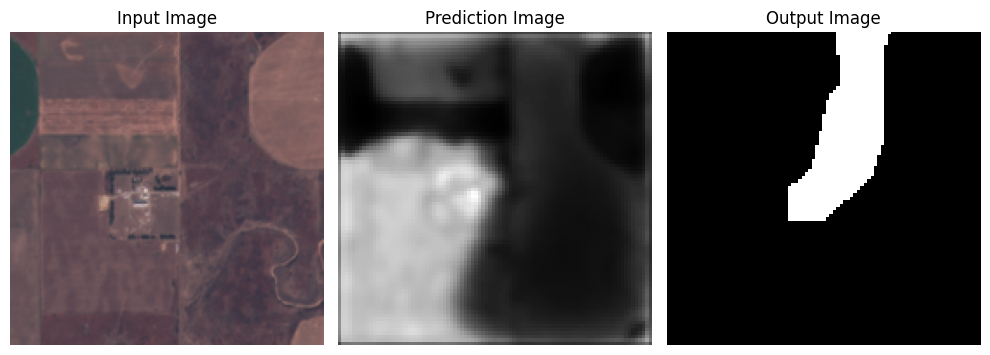

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import *


input_image_name= 'S2A_MSIL1C_20201103T172511_N0209_R012_T14SMG_20201103T195951_P643_0'

def plot_input_output_prediction(prediction=None ,input_image_name= input_image_name, directory = './data/DataTrain'  ):
    
    input_image_path= f'{directory}/tci_tiles/{input_image_name}_TCI.tif'
    print(input_image_path)
    # Load the input PNG image using rasterio
    input_image = Image.open(input_image_path)

    # Load the output CSV file
    output_csv_path = f'{directory}/output_matrix/{input_image_name}.csv'  # replace with your actual CSV file path
    output_image = pd.read_csv(output_csv_path, header=None).values

    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    # Plot the input image (PNG)
    axs[0].imshow(input_image, cmap='gray')
    axs[0].set_title('Input Image')
    axs[0].axis('off')  # Hide the axis

    # Plot the prediction image (CSV)
    axs[1].imshow(prediction, cmap='gray', interpolation='nearest')
    axs[1].set_title('Prediction Image')
    axs[1].axis('off')  # Hide the axis

    # Plot the output image (CSV)
    axs[2].imshow(output_image, cmap='gray', interpolation='nearest')
    axs[2].set_title('Output Image')
    axs[2].axis('off')  # Hide the axis

    # Show the plots
    plt.tight_layout()
    plt.show()


In [199]:
prediction

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
import os

full_path = 'w:\\summer school\\Methane leaks\\base research\\code\\Methane-Plume-Segmentation-main\\QCUnet-methane-leaks/data/DataTest/input_tiles/S2A_MSIL1C_20181127T173641_N0207_R055_T13SGR_20181127T210219_P606_0.tif'
file_name = os.path.basename(full_path)

print(file_name)


S2A_MSIL1C_20181127T173641_N0207_R055_T13SGR_20181127T210219_P606_0.tif
